# Dimensione Campionaria e Analisi della Potenza {#sec-n-power-sem}

::: {.chapterintro data-latex=""}
Nel contesto dei modelli di equazioni strutturali (SEM), è essenziale assicurarsi che uno studio abbia una dimensione campionaria sufficiente per ottenere stime attendibili degli effetti di interesse. La capacità di un modello di rilevare effetti dipende dal numero di osservazioni, dall’intensità dell’effetto da osservare e dalla precisione delle misurazioni. Stabilire a priori la dimensione campionaria necessaria permette di progettare studi solidi e informativi. Nei SEM, la complessità del modello richiede considerazioni specifiche per ottenere una buona qualità delle stime, sia per l’individuazione di effetti mirati che per il confronto tra modelli alternativi. 
:::

**Prerequisiti**

- Leggere l'articolo  *Estimating statistical power for structural equation models in developmental cognitive science: A tutorial in R* di @buchberger2024estimating.
- Leggere il capitolo 12 *Sample Size Determination and Power Analysis* del testo *Structural Equation Modeling Using R/SAS: A Step-by-step Approach with Real Data Analysis* [@chen2023structural].

**Concetti e Competenze Chiave**

- Determinazione della numerosità campionaria con metodi analitici nel caso della differenza tra due medie.
- Analisi di potenza nei modelli SEM.
- Utilizzo dei pacchetti `simsem` e `compute.es`.

**Preparazione del Notebook**

In [1]:
here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(
    semTools, tidyr, psych, lavaan, kableExtra, stringr, simsem, compute.es
)

## Introduzione

@buchberger2024estimating osservano che, nell'ultimo decennio, la questione della bassa potenza statistica e delle sue conseguenze sull'interpretazione dei risultati scientifici ha attirato un'attenzione crescente nella ricerca psicologica. La **potenza statistica** rappresenta la capacità di rilevare effetti reali, ovvero la probabilità di individuare correttamente un effetto quando è effettivamente presente. Questo valore dipende strettamente dalla dimensione campionaria, dall'entità dell'effetto che si intende rilevare e dall'affidabilità delle misurazioni.

La bassa potenza rappresenta un problema in quanto può limitare l'utilità scientifica dei risultati; inoltre, anche se si rilevano effetti significativi, questi potrebbero non riflettere associazioni reali. Per garantire che gli studi empirici siano adeguatamente progettati per rilevare gli effetti nei campioni esaminati, è cruciale calcolare in anticipo la potenza e stabilire la dimensione campionaria necessaria, evitando studi sotto-dimensionati.

In genere, in psicologia, si considera adeguata una potenza intorno a 0.80, anche se alcuni autori suggeriscono di puntare a valori più elevati, come 0.95, per bilanciare meglio gli errori di tipo I e tipo II.

Diversi autori hanno proposto regole pratiche per stabilire la dimensione campionaria nei modelli SEM, come un numero minimo di osservazioni o un rapporto tra osservazioni e parametri da stimare. Tuttavia, queste regole empiriche possono essere fuorvianti, poiché la potenza nei SEM dipende anche da fattori quali l’entità dei carichi fattoriali e la complessità del modello. Inoltre, la dimensione campionaria necessaria dipende dalla specifica domanda di ricerca.

## Obiettivi Principali dei Modelli SEM

@buchberger2024estimating fanno notare che i due obiettivi principali dei SEM sono:

1. **Rilevare un effetto specifico**, come determinare se la correlazione tra due fattori latenti è diversa da zero.
2. **Confrontare modelli**, verificando quale tra due o più modelli spiega meglio i dati.

Questi due obiettivi richiedono approcci diversi: il primo riguarda la potenza per rilevare un effetto mirato, mentre il secondo si concentra sulla potenza per individuare errori di specificazione del modello. Nei confronti tra modelli non nidificati (non derivabili l'uno dall'altro tramite restrizioni parametriche), i test basati sul $\chi^2$ non sono utilizzabili; è quindi necessario ricorrere a metodi alternativi, come le simulazioni Monte Carlo.

Molti studi SEM mirano a determinare se un parametro specifico differisca da un valore atteso. In tal caso, si confronta un modello in cui il parametro è stimato liberamente con uno in cui è fissato a un valore specifico. Se il confronto tra i modelli suggerisce una differenza significativa, si può concludere che il parametro differisce effettivamente dal valore atteso.

Per molti ricercatori, è rilevante individuare quale tra modelli teorici concorrenti descriva meglio i dati. Quando i modelli sono nidificati, è possibile usare metodi analitici basati sul $\chi^2$, mentre per modelli non nidificati si ricorre a tecniche di randomizzazione, come le simulazioni Monte Carlo. Questo approccio consente di stimare la potenza per confrontare modelli non nidificati senza compromettere le assunzioni teoriche del modello.

In conclusione, la determinazione della dimensione campionaria e l'analisi di potenza per i SEM richiedono una valutazione accurata della specificità della domanda di ricerca e delle ipotesi del modello, utilizzando approcci sia analitici che di simulazione per ottenere stime affidabili.

## Dimensione Campionaria per Confronti tra Gruppi

Per introdurre il metodo della simulazione Monte Carlo applicato all’analisi di potenza nei modelli SEM, seguiremo il tutorial di @chen2023structural. Prima di esplorare l’uso della simulazione Monte Carlo per stimare la potenza in contesti SEM, è utile applicare questo metodo a un caso più semplice: il calcolo della dimensione campionaria necessaria per rilevare una differenza clinicamente rilevante tra due gruppi. Questo esempio introduttivo aiuterà a chiarire il funzionamento della simulazione Monte Carlo. Successivamente, applicheremo lo stesso approccio alla determinazione della potenza per i modelli SEM, un caso più complesso che richiede tecniche avanzate di simulazione per stimare accuratamente la potenza.

### Formula per la Dimensione Campionaria per Gruppo

La formula per determinare la dimensione campionaria per ciascun gruppo, per rilevare una differenza clinicamente significativa tra due gruppi, è:

$$
n \geq 2 \left(\frac{s^2}{\delta^2}\right) \left[z_{1 - \alpha/2} + z_{1 - \beta}\right]^2,
$$ {#eq-sample-size-power}

dove:

- $s$ è la stima della deviazione standard (assumendo varianze omogenee tra i gruppi);
- $\delta$ è la differenza clinicamente rilevante tra i gruppi, cioè l’effetto minimo che si desidera rilevare;
- $z_{1 - \alpha/2}$ e $z_{1 - \beta}$ sono i valori critici della distribuzione normale standard per i limiti degli errori di tipo I e tipo II.

### Derivazione

Per calcolare la dimensione campionaria necessaria a confrontare le medie di due gruppi indipendenti, seguiamo i passaggi teorici necessari per derivare la formula finale. Il nostro interesse è quantificare la differenza tra le medie dei due gruppi, indicata come $\mu_1 - \mu_2$. Supponiamo che le due medie siano stimate da campioni con deviazione standard comune $\sigma$.

Poiché ciascuna media di campione ($\bar{X}_1$ per il gruppo 1 e $\bar{X}_2$ per il gruppo 2) ha varianza $\frac{\sigma^2}{n}$ e i campioni sono indipendenti, la varianza della differenza $\bar{X}_1 - \bar{X}_2$ è data dalla somma delle varianze:

$$
\text{Var}(\bar{X}_1 - \bar{X}_2) = \frac{\sigma^2}{n} + \frac{\sigma^2}{n} = \frac{2\sigma^2}{n}.
$$

Da qui, la deviazione standard della differenza tra le medie è quindi:

$$
\text{Deviazione standard} = \sqrt{\frac{2\sigma^2}{n}}.
$$

Per il teorema del limite centrale, questa differenza tra le medie segue una distribuzione normale, dato che $n$ è sufficientemente grande.

Per determinare la potenza del test e la dimensione campionaria necessaria, definiamo:

- **Ipotesi nulla $H_0$**: $\mu_1 - \mu_2 = 0$ (assenza di differenza significativa).
- **Ipotesi alternativa $H_1$**: $\mu_1 - \mu_2 = \delta$, dove $\delta$ rappresenta una differenza significativa che vogliamo rilevare.
- **Livello di significatività** $\alpha$: probabilità di rifiutare $H_0$ quando è vera (errore di Tipo I).
- **Potenza desiderata** $1-\beta$: probabilità di rilevare una vera differenza $\delta$ (cioè non commettere un errore di Tipo II).

Sotto l'ipotesi nulla, la differenza tra le medie campionarie, $\bar{X}_1 - \bar{X}_2$, ha media zero e deviazione standard $\sqrt{\frac{2\sigma^2}{n}}$. Possiamo quindi utilizzare la statistica $Z$ per standardizzare questa differenza:

$$
Z = \frac{(\bar{X}_1 - \bar{X}_2) - 0}{\sqrt{\frac{2\sigma^2}{n}}}.
$$

In un test a due code con livello di significatività $\alpha$, rifiutiamo $H_0$ se il valore assoluto di $Z$ supera $z_{1-\alpha/2}$, ovvero se:

$$
|\bar{X}_1 - \bar{X}_2| > z_{1-\alpha/2} \cdot \sqrt{\frac{2\sigma^2}{n}}.
$$

Questo ci dice che il valore critico per rifiutare $H_0$ è pari a $z_{1-\alpha/2} \cdot \sqrt{\frac{2\sigma^2}{n}}$. Tuttavia, poiché vogliamo assicurare una potenza del test pari a $1-\beta$, la differenza $\delta$ deve superare questo valore critico con probabilità $1 - \beta$.

Sotto l'ipotesi alternativa $H_1$, la differenza attesa tra le medie campionarie è $\delta$, e quindi standardizziamo rispetto alla deviazione standard della differenza:

$$
Z = \frac{\delta}{\sqrt{\frac{2\sigma^2}{n}}}.
$$

Imponiamo ora che la somma dei valori critici $z_{1-\alpha/2}$ e $z_{1-\beta}$ sia uguale a questa statistica test, ottenendo:

$$
\delta = \sqrt{\frac{2\sigma^2}{n}} (z_{1-\alpha/2} + z_{1-\beta}).
$$

Risolviamo questa equazione per $n$ al fine di ottenere la dimensione campionaria necessaria:

$$
n \geq \frac{2\sigma^2}{\delta^2} (z_{1-\alpha/2} + z_{1-\beta})^2.
$$

Nella pratica, non sempre conosciamo $\sigma^2$; pertanto, lo sostituiamo con la stima $s^2$, ottenendo:

$$
n \geq 2 \left(\frac{s^2}{\delta^2}\right) [z_{1-\alpha/2} + z_{1-\beta}]^2.
$$

Questa formula fornisce un modo pratico per calcolare la dimensione campionaria minima necessaria per garantire che il test abbia la potenza desiderata, tenendo conto della variabilità dei dati ($s^2$), dell’errore di Tipo I ($\alpha$), dell’errore di Tipo II ($\beta$), e della differenza minima rilevante $\delta$.

In conclusione, questa derivazione della dimensione campionaria è utile poiché:

- Consente di specificare il livello di controllo sugli errori di Tipo I e Tipo II.
- Tiene conto della variabilità campionaria attraverso la stima $s^2$.
- Permette di impostare una differenza minima rilevante da rilevare tra i gruppi.
- Fornisce una stima della dimensione campionaria necessaria per garantire la potenza statistica richiesta.

## Esempio Pratico

Consideriamo i dati seguenti, ponendo $\alpha$ = 0.05 e la potenza $1-\beta$ = 0.80:

In [2]:
mu2 <- 1.2
mu1 <- 1
sd <- 0.5 # SD of each group

alpha <- 0.05
beta <- 0.2

Calcoliamo la dimensione minima campionaria per ciascun gruppo:

In [ ]:
# Mean difference
delta <- mu2 - mu1

# Required sample size
n <- 2 * sd^2 / delta^2 * (qnorm(1 - alpha / 2) + qnorm(1 - beta))^2
n

[1] 98.1

## Collegamento con la Modellazione a Equazioni Strutturali

Il confronto tra due gruppi è un caso relativamente semplice rispetto alla complessità dei modelli a equazioni strutturali (SEM), i quali spesso richiedono approcci avanzati per il calcolo della potenza, come il **Monte Carlo Simulation-Based Approach** (MCSB). Per comprendere meglio questo metodo, è utile applicare inizialmente il MCSB a un caso base come il confronto tra le medie di due gruppi. Successivamente, estenderemo questo approccio per includere i SEM, dove la complessità delle relazioni e dei parametri richiede strumenti di simulazione più sofisticati.

### Applicazione del Metodo MCSB

Per implementare il metodo MCSB, dobbiamo definire due componenti principali:

- **Il modello generativo dei dati**, che descrive i parametri noti e serve per simulare i dati, come le differenze attese tra i gruppi e la variabilità delle misure.
- **Il modello di stima dei parametri**, che specifica come i parametri saranno stimati dai dati simulati, utilizzando un software di modellazione SEM come `lavaan` o `simsem`.

### Riformulazione del Confronto tra Trattamenti come Modello di Regressione

Possiamo rappresentare il confronto tra gruppi anche come modello di regressione lineare:

$$
y = \beta_0 + \beta_1 \cdot TRT + \epsilon,
$$

dove:

- $y$ è la variabile di esito,
- $TRT$ è una variabile indicatrice che differenzia i gruppi (1 per il gruppo trattato, 0 per il gruppo di controllo),
- $\beta_0$ rappresenta la media del gruppo di controllo,
- $\beta_1$ rappresenta la differenza media tra i gruppi,
- $\epsilon$ è il termine di errore, distribuito normalmente con media zero.

### Implementazione in R dell'Approccio MCSB con `simsem`

Per calcolare la potenza e stimare correttamente i parametri, è necessario determinare la dimensione dell’effetto e la varianza residua dell’esito $y$ in questa equazione. Di seguito, i passaggi per implementare il metodo MCSB:

1. **Calcolo del $d$ di Cohen**:  
   Supponiamo di avere una differenza clinicamente rilevante $\delta = 0.2$ e una deviazione standard $sd = 0.5$. La dimensione dell’effetto standardizzata, o $d$ di Cohen, è calcolata come:
   
   $$
   d = \frac{\delta}{sd} = \frac{0.2}{0.5} = 0.4.
   $$

2. **Conversione di $d$ in Coefficiente di Correlazione $r$**:  
   Spesso è utile esprimere la dimensione dell’effetto in termini di coefficiente di correlazione $r$, che riflette la forza dell’associazione tra trattamento e esito. Il pacchetto `compute.es` in R include la funzione `des()` per convertire $d$ in un valore di correlazione equivalente $r$.
   
   Usando `des(d, n.1 = n, n.2 = n)`, otteniamo un valore approssimativo di $r \approx 0.2$.

3. **Calcolo della Varianza di $y$**:  
   In questo contesto, il coefficiente $r = 0.2$ rappresenta l’associazione tra il trattamento (TRT) e l’esito $y$. La varianza totale di $y$ può essere separata in una parte spiegata (dall’effetto di $TRT$) e una parte non spiegata. La varianza residua di $y$, dopo aver tenuto conto del predittore, è data da $1 - r^2$, poiché $r^2$ rappresenta la proporzione della varianza di $y$ spiegata dal trattamento:
   
   $$
   \text{var}(y) = 1 - r^2.
   $$
   
   Sostituendo $r = 0.2$:
   
   $$
   \text{var}(y) = 1 - (0.2)^2 = 1 - 0.04 = 0.96.
   $$

Questi passaggi possono essere implementati in R utilizzando il pacchetto `compute.es`, facilitando il calcolo e la configurazione della simulazione per l’analisi di potenza con `simsem`.

In [4]:
# Calcolo dell'ES in termini di d
d <- delta / sd
# print(d) # E.g., [1] 0.4

# Conversione in altre misure di ES
d2ES <- des(d, n.1 = n, n.2 = n, verbose = FALSE)

# Estrazione di r
r <- d2ES$r
print(r) # E.g., [1] 0.2

# Calcolo della varianza di y
var.y <- 1 - r**2
print(var.y) # E.g., [1] 0.96

[1] 0.2
[1] 0.96


Per utilizzare `simsem`, è necessario specificare il processo di generazione dei dati. Per il caso presente abbiamo:

In [5]:
# Modello di generazione dei dati
datMod <- "
    # Regressione con correlazione nota di 0.2
    y ~ 0.2*TRT
    # Varianza dell'errore
    y ~~ 0.96*y
"

Il valore $0.2$ in `y ~ 0.2*TRT` rappresenta tecnicamente un **coefficiente di regressione**. Tuttavia, se le variabili sono standardizzate, questo valore coincide con la **correlazione** tra la variabile predittore $TRT$ e la variabile di risposta $y$. 

In questo contesto, considerare il coefficiente di correlazione è utile poiché ci permette di calcolare facilmente la varianza residua di $y$. Conoscendo $r$, infatti, possiamo stabilire la varianza residua come $1 - r^2$, semplificando la specifica del modello.

Il modello di stima è il seguente:

In [6]:
# Modello di stima
estMod <- "
    # Regressione
    y ~ TRT
"

Possiamo ora eseguire la simulazione MCSB:

In [8]:
simOut <- sim(
    nRep = 1000, 
    generate = datMod, 
    model = estMod, 
    n = 198,
    lavaanfun = "sem", 
    seed = 123, 
    silent = TRUE
)

Nella simulazione eseguita con `simOut`, il parametro `nRep` indica il numero di repliche, che è stato impostato a 1000 per ridurre i tempi di esecuzione. Idealmente, sarebbe preferibile un numero più elevato (ad esempio >10.000) per ottenere risultati più precisi. Il parametro `generate` specifica il modello di generazione dei dati (qui `datMod`), mentre `model` collega al modello di stima (qui `estMod`) utilizzando la funzione `lavaanfun = "sem"`. La dimensione del campione, `n`, è impostata a 198 per il calcolo della potenza statistica, e `seed` consente di riprodurre la simulazione con gli stessi risultati. L’opzione `silent = TRUE` sopprime l’output intermedio per semplificare la visualizzazione.

Esaminiamo l'output della simulazione.

In [9]:
summaryParam(simOut)

,Estimate Average,Estimate SD,Average SE,Power (Not equal 0),Std Est,Std Est SD,Std Ave SE,Average Param,Average Bias,Coverage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
y~TRT,0.202,0.0693,0.0698,0.816,0.201,0.0675,0.0671,0.20,0.00219,0.953
y~~y,0.956,0.0969,0.0960,1.000,0.955,0.0271,0.0267,0.96,-0.00433,0.942


L’output mostra diverse colonne relative ai parametri stimati con due righe: la prima riga è per lo stimatore della correlazione tra $y$ e `TRT` (cioè il coefficiente di regressione), mentre la seconda riga si riferisce alla varianza residua di $y$ in `y ~~ y`.

1. **Estimate Average**: È la media delle stime dei parametri nelle 1000 repliche. I valori ottenuti (0.202 per `y ~ TRT` e 0.956 per `y ~~ y`) sono molto vicini ai valori simulati, cioè $r = 0.2$ e $\text{var}(y) = 0.96$, indicando che le stime sono coerenti con i parametri di partenza.

2. **Estimate SD**: È la deviazione standard delle stime dei parametri tra le repliche. Rappresenta la variabilità delle stime nei vari set di dati simulati, e aiuta a capire la precisione delle stime.

3. **Average SE**: È la media degli errori standard delle stime in tutte le repliche, un’indicazione della variabilità stimata del parametro per ogni replica.

4. **Power (Not equal 0)**: Questa colonna indica la proporzione di repliche in cui i parametri sono risultati significativamente diversi da zero. Qui la potenza statistica per `y ~ TRT` è 0.816, vicina al valore target di 0.80. La lieve differenza potrebbe essere ridotta aumentando `nRep`.

5. **Average Param**: Rappresenta i valori medi dei parametri simulati. In questo caso, sono i valori di partenza utilizzati nel modello di generazione dei dati, cioè 0.20 per `y ~ TRT` e 0.96 per `y ~~ y`.

6. **Average Bias**: È la differenza tra i valori medi stimati e i parametri di partenza. Nel nostro caso, il bias è molto piccolo, indicando che le stime sono ben centrate attorno ai parametri di partenza.

7. **Coverage**: Indica la percentuale di intervalli di confidenza che contengono i valori veri dei parametri. In generale, ci si aspetta una copertura intorno al 95% per un intervallo di confidenza al 95%, qui abbiamo coperture di 95.3% e 94.2%, il che è in linea con le aspettative.

In sintesi, i risultati della simulazione mostrano stime accurate e, con una numerosità campionaria totale di $n = 198$, raggiungono una potenza statistica vicina all’obiettivo di 0.80, accompagnata da un bias minimo e una buona copertura.

In altre parole, questa dimostrazione evidenzia come la tecnica di simulazione MCSB riesca, nel caso del confronto tra le medie di due gruppi, a collegare la dimensione del campione alla potenza del test, tenendo conto dell’ampiezza dell’effetto e della variabilità campionaria, in linea con le aspettative teoriche.

## Analisi di Potenza nei Modelli SEM

Dopo aver compreso l’approccio MCSB e la sua implementazione in **simsem**, possiamo ora illustrare come calcolare la potenza per modelli di equazioni strutturali (SEM) generali. Un esempio è offerto da @chen2023structural, che utilizzano un modello di crescita latente (LGC) per analizzare i dati di @byrne2013structural.

::: {.data data-latex=""}
Il dataset raccoglie i dati longitudinali raccolti da 405 donne di Hong Kong, sottoposte a valutazione post-chirurgica per il tumore al seno [@byrne2013structural].
:::

I dati, disponibili nel file `hkcancer_red2.dat`, includono 10 variabili:

- **ID**: identificatore di ciascuna partecipante.
- **MOOD1, MOOD4, MOOD8**: valutazioni soggettive dello stato d’animo a 1, 4 e 8 mesi dall’intervento; punteggi più alti indicano un umore peggiore.
- **SOCADJ1, SOCADJ4, SOCADJ8**: misure di adattamento sociale a 1, 4 e 8 mesi; punteggi più alti indicano un miglior adattamento sociale.
- **Age**: età della partecipante al momento dell’intervento.
- **AgeGrp**: categoria di età (dichotomizzata) con ‘Younger’ (< 50 anni) e ‘Older’ (> 50 anni).
- **SurgTX**: tipo di intervento chirurgico, distinguendo tra lumpectomia e mastectomia.

### Modello di Crescita Latente (LGC)

Il modello di crescita latente consente di modellare le traiettorie di crescita nel tempo e di confrontare differenze tra gruppi (ad esempio, tra gruppi di età o di intervento). Questo modello permette di analizzare sia le variazioni intra-individuali che quelle inter-individuali nel contesto delle traiettorie longitudinali. Nel caso del dataset sul tumore al seno, possiamo modellare sia il cambiamento longitudinale dello stato d’animo (MOOD) che dell’adattamento sociale (SOCADJ) lungo un periodo di 8 mesi, includendo le variazioni tra le partecipanti nelle loro traiettorie.

@chen2023structural affrontano la questione della determinazione della dimensione campionaria necessaria per rilevare un effetto significativo su "MOOD" con una potenza statistica pari a 0.80.

### Calcolo della Dimensione Campionaria

Per determinare la dimensione campionaria necessaria a rilevare l’effetto dell’intervento chirurgico su "MOOD", è necessario specificare il modello generativo dei dati, che comprende tutti i parametri del modello. Questi parametri descrivono il cambiamento atteso dello stato d’animo nel tempo in relazione al tipo di intervento.

Prima di procedere con l’analisi di potenza, carichiamo i dati in R per adattare il modello in base alle osservazioni empiriche. Ecco come eseguire il caricamento dei dati: 

In [11]:
dCancer <- rio::import(here::here("data", "hkcancer_red2.dat"))

Ambiguous file format ('.dat'), but attempting 'data.table::fread("/Users/corradocaudek/_repositories/testing_psicologico/data/hkcancer_red2.dat")'




In [12]:
# Replace all "*" with NA in dCancer
dCancer[dCancer == "*"] <- NA
head(dCancer)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,3,2,15.000000,NA,NA,95.906250,NA,NA,70,1,1
2,2,3,16.000000,25.000000,22.000000,114.888889,105.111111,90.444444,47,0,1
3,2,2,37.000000,26.000000,25.000000,80.666667,95.333333,95.333333,47,0,1
4,2,2,19.000000,16.000000,15.000000,112.838710,108.580645,99.000000,52,1,1
5,1,2,13.000000,16.000000,14.000000,115.000000,105.000000,101.000000,43,0,1
6,1,1,21.000000,28.000000,19.000000,106.451613,114.967742,107.516129,34,0,0


In [13]:
var_names <- c(
"X1", "X2", "MOOD1", "MOOD4", "MOOD8", "SOCADJ1", "SOCADJ4", "SOCADJ8", "Age",  
"AgeGrp", "SurgTx")

names(dCancer) <- var_names
head(dCancer)

,X1,X2,MOOD1,MOOD4,MOOD8,SOCADJ1,SOCADJ4,SOCADJ8,Age,AgeGrp,SurgTx
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,3,2,15.000000,NA,NA,95.906250,NA,NA,70,1,1
2,2,3,16.000000,25.000000,22.000000,114.888889,105.111111,90.444444,47,0,1
3,2,2,37.000000,26.000000,25.000000,80.666667,95.333333,95.333333,47,0,1
4,2,2,19.000000,16.000000,15.000000,112.838710,108.580645,99.000000,52,1,1
5,1,2,13.000000,16.000000,14.000000,115.000000,105.000000,101.000000,43,0,1
6,1,1,21.000000,28.000000,19.000000,106.451613,114.967742,107.516129,34,0,0


Questa preparazione ci consentirà di configurare il modello LGC con `simsem`, impostando i parametri di interesse in modo da simulare la potenza con il metodo MCSB e verificare la capacità del modello di rilevare gli effetti desiderati su "MOOD".

Definiamo il modello a crescita latente.

In [16]:
mod4MOOD <- "
    # Intercept and Slope with fixed-coefficients
    iMOOD =~ 1*MOOD1 + 1*MOOD4 + 1*MOOD8
    sMOOD =~ 0*MOOD1 + 1*MOOD4 + 2.33*MOOD8
    
    # Regression with a labeled for simulation
    iMOOD ~ SurgTx
    sMOOD ~ a*SurgTx
"

Questo modello di crescita latente è utilizzato per analizzare l’evoluzione dello stato d’animo (MOOD) di un gruppo di persone a tre momenti distinti nel tempo (1, 4 e 8 mesi dopo l’intervento chirurgico).

Il modello ha due componenti principali: **intercetta** e **pendenza**. Queste rappresentano rispettivamente il valore iniziale e la velocità di cambiamento dello stato d’animo nel tempo.

1. **Intercetta (iMOOD)**: l’intercetta rappresenta il punto di partenza o il livello iniziale dello stato d’animo (MOOD). Nel modello, è definita come:

   ```R
   iMOOD =~ 1*MOOD1 + 1*MOOD4 + 1*MOOD8
   ```

   Qui, `iMOOD` è una variabile latente che cattura il livello medio dello stato d’animo in ciascun momento, usando coefficienti fissati a 1 per indicare che ogni misura contribuisce allo stesso modo alla stima dell’intercetta. Questo implica che l’intercetta è il valore di base dello stato d’animo comune a tutti i partecipanti nei tre punti temporali.

2. **Pendenza (sMOOD)**: la pendenza rappresenta la velocità e la direzione del cambiamento dello stato d’animo nel tempo.

   ```R
   sMOOD =~ 0*MOOD1 + 1*MOOD4 + 2.33*MOOD8
   ```

   Qui, `sMOOD` è una variabile latente che descrive come cambia lo stato d’animo nei diversi momenti temporali. I coefficienti (0, 1, 2.33) riflettono l’intervallo di tempo tra le misurazioni (ad esempio, da 1 a 8 mesi). Il coefficiente 2.33 per MOOD8 indica che l’effetto temporale si accumula, essendo il punto finale del periodo di osservazione.

Il modello include anche delle **regressioni** che collegano l’intercetta e la pendenza a una variabile predittiva, il tipo di intervento chirurgico (SurgTx), che distingue tra due gruppi (lumpectomia e mastectomia).

- `iMOOD ~ SurgTx`: questa regressione rappresenta l'effetto del tipo di intervento sul livello iniziale dello stato d’animo. In altre parole, cerca di vedere se esiste una differenza nello stato d’animo iniziale in base al tipo di intervento ricevuto.
- `sMOOD ~ a*SurgTx`: questa regressione, con un coefficiente etichettato `a`, rappresenta l’effetto del tipo di intervento sul tasso di cambiamento dello stato d’animo nel tempo. Il coefficiente `a` mostra se il tipo di intervento influisce sulla velocità di miglioramento o peggioramento dello stato d’animo lungo i mesi.

In sintesi, questo modello di crescita latente analizza sia il livello iniziale dello stato d’animo (intercetta) sia il cambiamento nel tempo (pendenza) e verifica se il tipo di intervento chirurgico influenza questi due aspetti.

Adattiamo il modello ai dati.

In [17]:
# Call growth function to fit the LGC
fitMOOD <- growth(mod4MOOD,
    data = dCancer, 
    estimator = "MLR",
    missing = "fiml"
)

In [28]:
summary(fitMOOD) |> print()

lavaan 0.6-19 ended normally after 75 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                           405
  Number of missing patterns                         8

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 2.022       2.077
  Degrees of freedom                                 2           2
  P-value (Chi-square)                           0.364       0.354
  Scaling correction factor                                  0.974
    Yuan-Bentler correction (Mplus variant)                       

Parameter Estimates:

  Standard errors                             Sandwich
  Information bread                           Observed
  Observed information based on                Hessian

Latent Variables:
                   Estimate  Std.Err  z-v

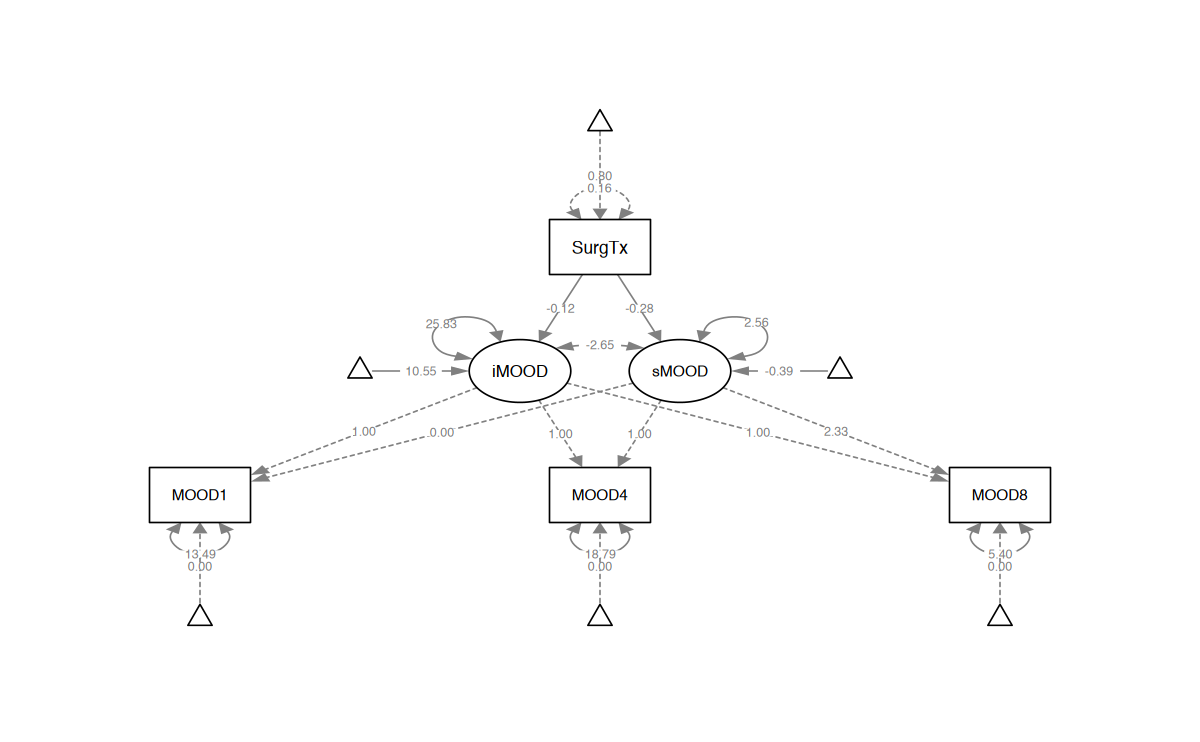

In [43]:
semPlot::semPaths(fitMOOD,
    what = "col", 
    whatLabels = "par", 
    nCharNodes = 8,
    shapeMan = "rectangle", 
    sizeMan = 8, 
    sizeMan2 = 7
)

Una volta ottenute le stime dei parametri del modello, possiamo utilizzarle per costruire la componente di generazione dei dati come segue (nel codice seguente, utilizzo i valori usati da @chen2023structural per riprodurre il loro risultato).

In [32]:
dat.mod4MOOD <- "
    # Intercept and Slope with MOOD
    iMOOD =~ 1*MOOD1 + 1*MOOD4 + 1*MOOD8
    sMOOD =~ 0*MOOD1 + 1*MOOD4 + 2.33*MOOD8
    # residual variances for observed
    MOOD1 ~~ 14.307*MOOD1
    MOOD4 ~~ 18.637*MOOD4
    MOOD8 ~~ 6.745*MOOD8
    # Regression paths to covariates
    iMOOD ~ (-0.116)*SurgTx
    sMOOD ~ a*SurgTx + (-0.332)*SurgTx
    # latent Intercepts
    iMOOD ~ 21.683*1
    sMOOD ~ 0.004*1
    # latent variances/coVariances
    iMOOD ~~ 25.826*iMOOD
    sMOOD ~~ 2.272*sMOOD
    iMOOD ~~ (-2.135)*sMOOD
    # mean and variance for SurgTX
    SurgTx ~ 0.5*1
    SurgTx ~~ 0.25*SurgTx
"

Possiamo ora usare la funzione `sim()` di `simsem`. Seguendo il tutorial di @chen2023structural, fissiamo la dimensione campionaria complesiva a `n = 405`:

In [33]:
simOut1 <- sim(
    nRep = 1000, 
    generate = dat.mod4MOOD,
    model = mod4MOOD, 
    n = 405, 
    lavaanfun = "growth",
    seed = 123, 
    silent = TRUE
)

In [34]:
# simulation output
summary(simOut1)

RESULT OBJECT
Model Type
[1] "lavaan"
========= Fit Indices Cutoffs ============
           Alpha
Fit Indices      0.1     0.05     0.01    0.001     Mean     SD
      chisq    4.455    5.665    8.871   11.378    1.980  1.888
      aic   7571.694 7588.105 7624.726 7667.762 7508.592 49.361
      bic   7611.733 7628.144 7664.765 7707.801 7548.631 49.361
      rmsea    0.055    0.067    0.092    0.108    0.016  0.025
      cfi      0.994    0.991    0.983    0.975    0.998  0.004
      tli      0.982    0.972    0.948    0.926    1.000  0.014
      srmr     0.018    0.020    0.026    0.028    0.011  0.005
========= Parameter Estimates and Standard Errors ============
             Estimate Average Estimate SD Average SE Power (Not equal 0)
iMOOD~SurgTx           -0.088       0.614      0.607               0.056
a                      -0.337       0.244      0.242               0.287
MOOD1~~MOOD1           14.312       2.882      2.816               1.000
MOOD4~~MOOD4           18.563      

Possiamo osservare che la potenza associata al parametro $a$ (cioè, l'effetto dell'intervento chirurgico) è 0.287, il che non sorprende, dato che sapevamo già che questo parametro non è statisticamente significativo con la dimensione campionaria attuale di 405. 

La domanda successiva è quindi quale dimensione campionaria sia necessaria per ottenere una potenza pari a 0.80. A questo fine, è necessario applicare l’approccio MCSB per una serie di dimensioni campionarie, in modo da calcolare le rispettive potenze. 

@chen2023structural costruiscono una curva che mostra la relazione tra dimensione campionaria e potenza, così da identificare la dimensione campionaria necessaria per raggiungere una potenza di 0.80. Per questo scopo, @chen2023structural utilizzano `n = rep(seq(400, 2000, by = 200), 500)`, per eseguire l'MCSB su una sequenza di dimensioni campionarie da 400 a 2000, con incrementi di 200 (ovvero: 400, 600, 800, 1000, 1200, 1400, 1600, 1800, e 2000), ciascuna delle quali sarà utilizzata per 500 simulazioni.

In [35]:
# Simulation for sequential sample size
simAll <- sim(
    nRep = NULL, 
    generate = dat.mod4MOOD,
    model = mod4MOOD, 
    n = rep(seq(400, 2000, 200), 500),
    lavaanfun = "growth", 
    seed = 123, 
    silent = TRUE
    ) 

In [36]:
# Print the simulations
summary(simAll)

RESULT OBJECT
Model Type
[1] "lavaan"
========= Fit Indices Cutoffs ============
     N chisq   aic   bic rmsea   cfi   tli  srmr
1  400  6.19  7503  7545 0.061 0.993 0.978 0.019
2  800  6.04 14933 14979 0.053 0.994 0.983 0.016
3 1200  5.88 22363 22413 0.044 0.996 0.987 0.013
4 1600  5.73 29793 29847 0.036 0.997 0.992 0.011
5 2000  5.57 37223 37281 0.027 0.999 0.996 0.008
========= Parameter Estimates and Standard Errors ============
             Estimate Average Estimate SD Average SE Power (Not equal 0)
iMOOD~SurgTx           -0.122       0.400      0.387               0.066
a                      -0.327       0.163      0.154               0.607
MOOD1~~MOOD1           14.298       1.831      1.794               1.000
MOOD4~~MOOD4           18.662       1.230      1.178               1.000
MOOD8~~MOOD8            6.700       2.223      2.163               0.855
iMOOD~~iMOOD           25.761       2.094      2.033               1.000
sMOOD~~sMOOD            2.265       0.722      0.70

Utilizzando la funzione `getPower`, è quindi ottenere le stime di potenza per ciascuna dimensione campionaria come segue:

In [37]:
LGC.N <- getPower(simAll)
# Find the samplesize for 80% power
findPower(LGC.N, "N", 0.8) |> print()

iMOOD~SurgTx            a MOOD1~~MOOD1 MOOD4~~MOOD4 MOOD8~~MOOD8 
          NA         1710          Inf          Inf          816 
iMOOD~~iMOOD sMOOD~~sMOOD iMOOD~~sMOOD      iMOOD~1      sMOOD~1 
         Inf          748         1161          Inf           NA 


Pertanto, in base alla simulazione di @chen2023structural, sarebbe necessaria una dimensione campionaria di 1710 per ottenere una potenza di 0.80. 

Questo risultato può essere mostrato graficamente nella figura seguente. In questa figura, la linea tratteggiata orizzontale indica la potenza a 0.80, mentre la linea con la freccia che va da questa linea orizzontale a $N$ = 1710 indica la dimensione campionaria determinata dalla curva di potenza.

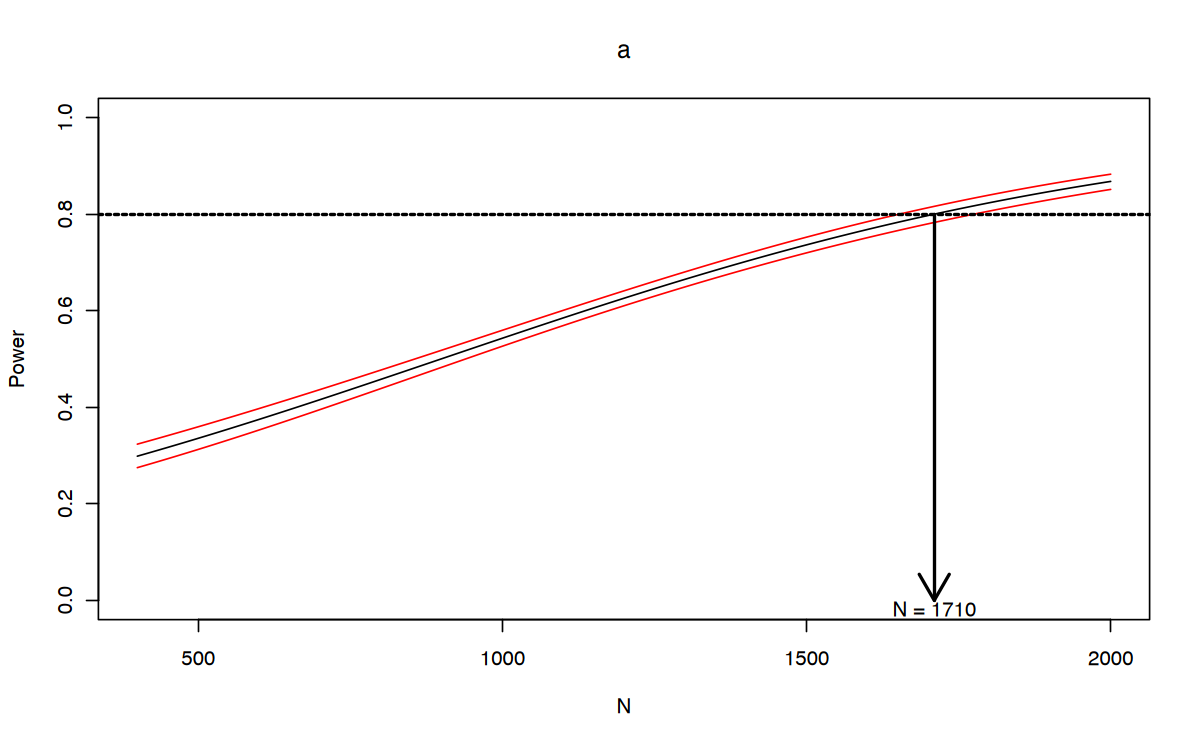

In [38]:
# Call plotPower to plot the power to sample size
plotPower(simAll, powerParam = "a")
# Add a horizontal line of 0.80
abline(h = 0.8, lwd = 2, lty = 8)
arrows(1710, 0.8, 1710, 0, lwd = 2)
text(
    1710,
    -0.018, "N = 1710"
)

## Riflessioni Conclusive

In questo capitolo, abbiamo illustrato come determinare la dimensione campionaria e calcolare la potenza statistica utilizzando l’approccio basato sulla simulazione Monte Carlo. Questo metodo rappresenta l’approccio più generale e flessibile per ottenere stime affidabili della dimensione campionaria e della potenza necessarie alla progettazione di studi in vari contesti di ricerca, inclusi i modelli a equazioni strutturali (SEM).

La simulazione Monte Carlo consente di affrontare situazioni complesse e realistiche che spesso non sono gestibili con metodi analitici tradizionali. Essa permette infatti di modellare vari scenari, includendo la variabilità dei parametri e le incertezze che caratterizzano i dati empirici. Inoltre, il metodo può essere applicato a una vasta gamma di modelli statistici, garantendo flessibilità nell’adattamento a diversi contesti di studio e domande di ricerca.

In conclusione, il metodo basato sulla simulazione Monte Carlo offre un potente strumento per pianificare studi empirici robusti e ben fondati, permettendo ai ricercatori di prendere decisioni informate riguardo alla dimensione del campione e alla configurazione del modello in relazione agli obiettivi specifici del loro studio.

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [27]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] quantreg_5.99     compute.es_0.2-5  simsem_0.5-16     kableExtra_1.4.0 
 [5] MASS_7.3-61       viridis_0.6.5     viridisLite_0.4.2 ggpubr_0.6.0     
 [9] ggExtra_0.10.1    gridExtra_2.3     patchwork_1.3.0   bayesplot_1.11.1 
[13] semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-19     psych_2.4.6.26   
[17] scales_1.3.0      markdown_1.13     knitr_1.49        lubridate_1.9.3  
[21] 